In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygmt

In [3]:

# stfn='CA_North_BK/station_list.csv'
# stbk=pd.read_csv(stfn)
# stfn='CA_North_NC/station_list.csv'
# stnc=pd.read_csv(stfn)
stfn='CA_South/station_list.csv'
stci=pd.read_csv(stfn)

# stall=pd.concat([stbk,stnc,stci],ignore_index=True)
stall=stci.copy()
stall=stall.drop_duplicates(subset='netst',keep='first')


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


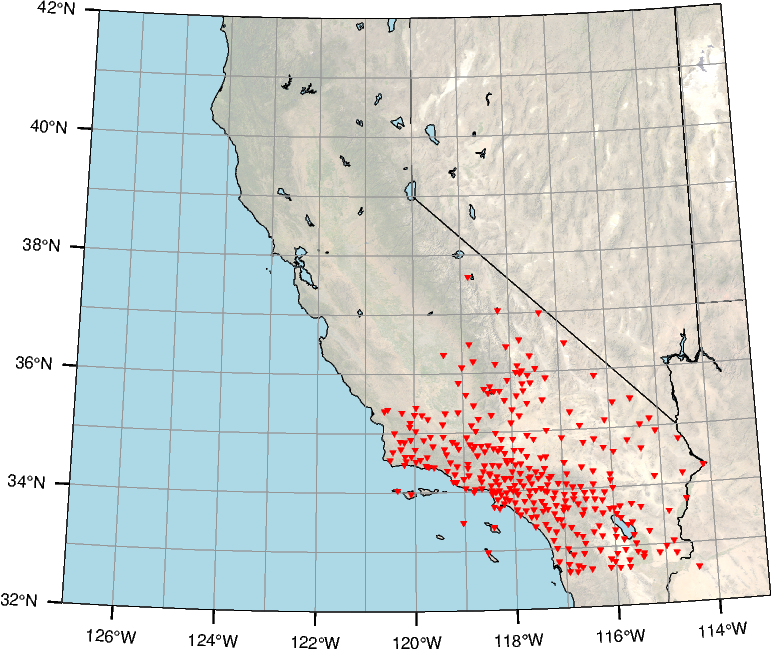

In [7]:

# PNW - Q
region=[-127,-113,32,42]
proj='L-121/41/32/42/6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=70)
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
          water='lightblue', shorelines='0/0.1p',)

# seismic stations
# fig.plot(x=stbk.stlo,    y=stbk.stla, style = "i0.025i", fill="purple")
# fig.plot(x=stnc.stlo,    y=stnc.stla, style = "i0.025i", fill="green")
fig.plot(x=stci.stlo,    y=stci.stla, style = "i0.025i", fill="red")

fig.show()
# fname='MAP_STAALL.png'
# fig.savefig(fname, dpi=300)

In [8]:
stack_method='robust'
# fn=f'CA_North_BK/OUTPUT_{stack_method}.csv'
# pd_BK = pd.read_csv(fn)
# fn=f'CA_North_NC/OUTPUT_{stack_method}.csv'
# pd_NC = pd.read_csv(fn)
fn=f'CA_South/OUTPUT_{stack_method}.csv'
pd_CI = pd.read_csv(fn)


In [9]:

# print(f'BK HH-comp: {len(pd_BK.netst.unique())}')
# print(f'NC HH-comp: {len(pd_NC.netst.unique())}')
print(f'CI HH-comp: {len(pd_CI.netst.unique())}')


CI HH-comp: 203


In [10]:
data=pd_CI[['netst','stla','stlo']].drop_duplicates()
data.to_csv('CI.csv',index=False)

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
/tmp/ipykernel_358865/3578375424.py:16: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'series' instead.
  pygmt.makecpt(cmap='viridis', T='0/3', continuous=True, log=True)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


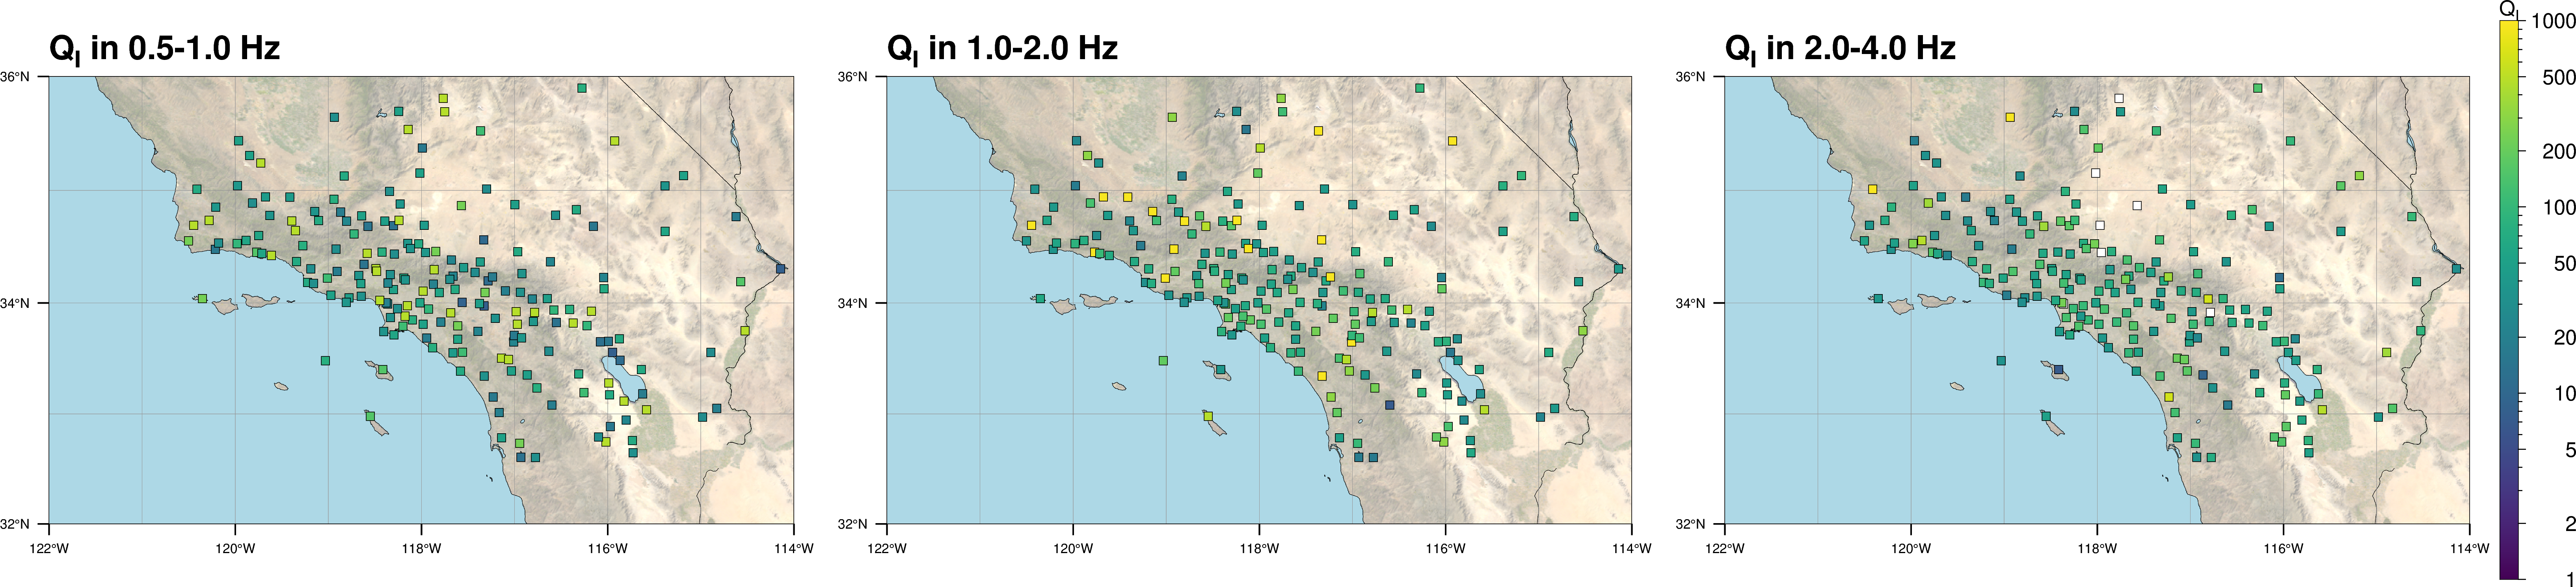

In [11]:

# PNW - Q
region=[-122,-114,32,36]
proj='M8c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
for k, freq in enumerate(pd_CI.fband.unique()):

    single_CI=pd_CI.loc[pd_CI.fband == freq]   
    fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
    fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)

    # Make a logarithmic color palette
    pygmt.makecpt(cmap='viridis', T='0/3', continuous=True, log=True)

    # seismic stations
    fig.plot(x=single_CI.stlo,    y=single_CI.stla, style = "s0.05i",pen="0.1p,black", cmap=True, fill=single_CI.intQ)
    fig.text(x=-122,y=36.15,text=f'Q@-I@- in {freq} Hz', font="10p,Helvetica-Bold,0", no_clip=True, justify="BL" )
    
    fig.shift_origin(xshift="9c")
pygmt.config(FONT_ANNOT='10p',)
fig.shift_origin(xshift="-9.5c")
fig.colorbar( cmap=True, log=True,   position="JRM+w6c/0.2c",     frame=["a2f3", "y+lQ@-I@-"],)

fig.show(dpi=600)
# fname='MAP_STA.png'
# fig.savefig(fname, dpi=300)

In [12]:
vsfn='sta_CI_vs30.csv'
pd_vs=pd.read_csv(vsfn)
pd_vs.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'sta_CI_vs30.csv'

In [ ]:
data=pd_CI
data['Q-1']=1/data.intQ
data['fmid']=(data.fmax+data.fmin)/2


In [ ]:
vs30=[]
for st in data.netst:
    vs=pd_vs.loc[pd_vs.netst==st]['vs30'].values[0]
    vs30.append(vs)
    
data['vs30']=vs30
data.to_csv('BBQ_CI_comb.csv',index=False)